# Worksheet 06

Name:  Zihan Li

UID: U83682995

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

The difference of K-means and K-means++ is in initialization of the centroids. K-means randomly selects the initial centroids from the data points, which can sometimes lead to poor clustering performance. K-means++, on the other hand, employs a smarter initialization technique that tends to select centroids that are distant from each other. This approach improves the chances of converging to a better solution.

b) What are some limitations of K means ++?

 K-means++ is sensitive to the choice of K, which needs to be specified beforehand. An inappropriate choice of K can lead to poor clustering results. Beside this, K-means++ is also sensitive to outliers, as outliers can significantly influence the position of centroids, leading to suboptimal clustering.

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

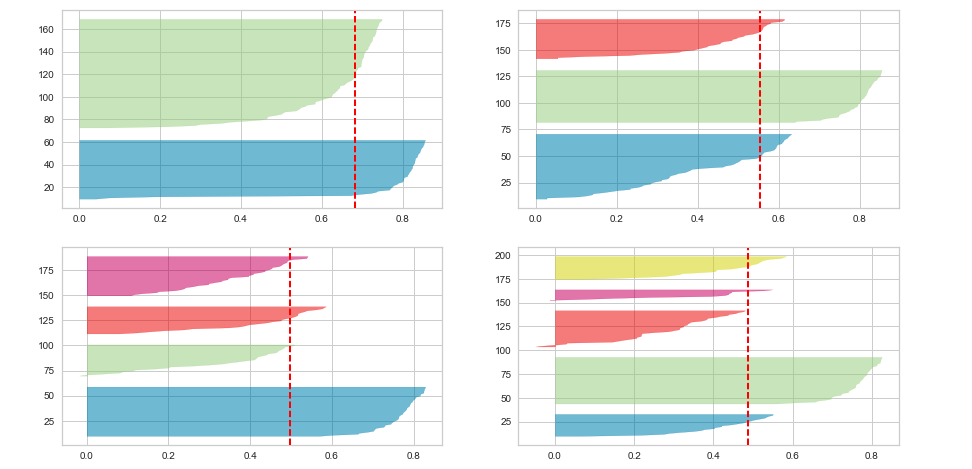

In [10]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

I will choose 3 Clusters K, because it has the highest average silhouette score, which suggests that the clusters are well separated and that the data points are, on average, closer to their own cluster's center than to the centers of other clusters. Additionally, the distribution of the scores within the clusters is relatively tight, indicating good consistency within the clusters.

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |   |   |   |   |
| B |1.41| 0 |   |   |   |
| C |  3|2.23| 0 |   |   |
| D |  1|  1|3.16| 0 |   |
| E |2.83|1.41|2.23|2.23| 0 |

Step 2

|   |   (A,D)|   B|   C|   E|
|---|---|---|---|---|
|  (A,D) | 0 |   |   |   |
|   B|   1| 0 |   |   |
|   C|   3|   2.23| 0 |   |
|   E|   2.23|   1.41|   2.23| 0 |

Step 3

|   |   (A,B,D)|   C|   E|
|---|---|---|---|
|   (A,B,D)| 0 |   |   |
|   C|   2.23| 0 |   |
|   E|   1.41|   2.23| 0 |

Step 4

|   |   (A,B,D,E)|   C|
|---|---|---|
|   (A,B,D,E)| 0 |   |
|   C|   2.23| 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |   |   |   |   |
| B |1.41| 0 |   |   |   |
| C |  3|2.23| 0 |   |   |
| D |  1|  1|3.16| 0 |   |
| E |2.83|1.41|2.23|2.23| 0 |

Step 2

|   |   (A,D)|   B|   C|   E|
|---|---|---|---|---|
|  (A,D) | 0 |   |   |   |
|   B|   1.41| 0 |   |   |
|   C|   3.16|   2.23| 0 |   |
|   E|   2.83|   1.41|   2.23| 0 |

Step 3

|   |   (A,B,D)|   C|   E|
|---|---|---|---|
|   (A,B,D)| 0 |   |   |
|   C|   3.16| 0 |   |
|   E|   2.83|   2.23| 0 |

Step 4

|   |   (A,B,D,E)|   C|
|---|---|---|
|   (A,B,D,E)| 0 |   |
|   C|   3.16| 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

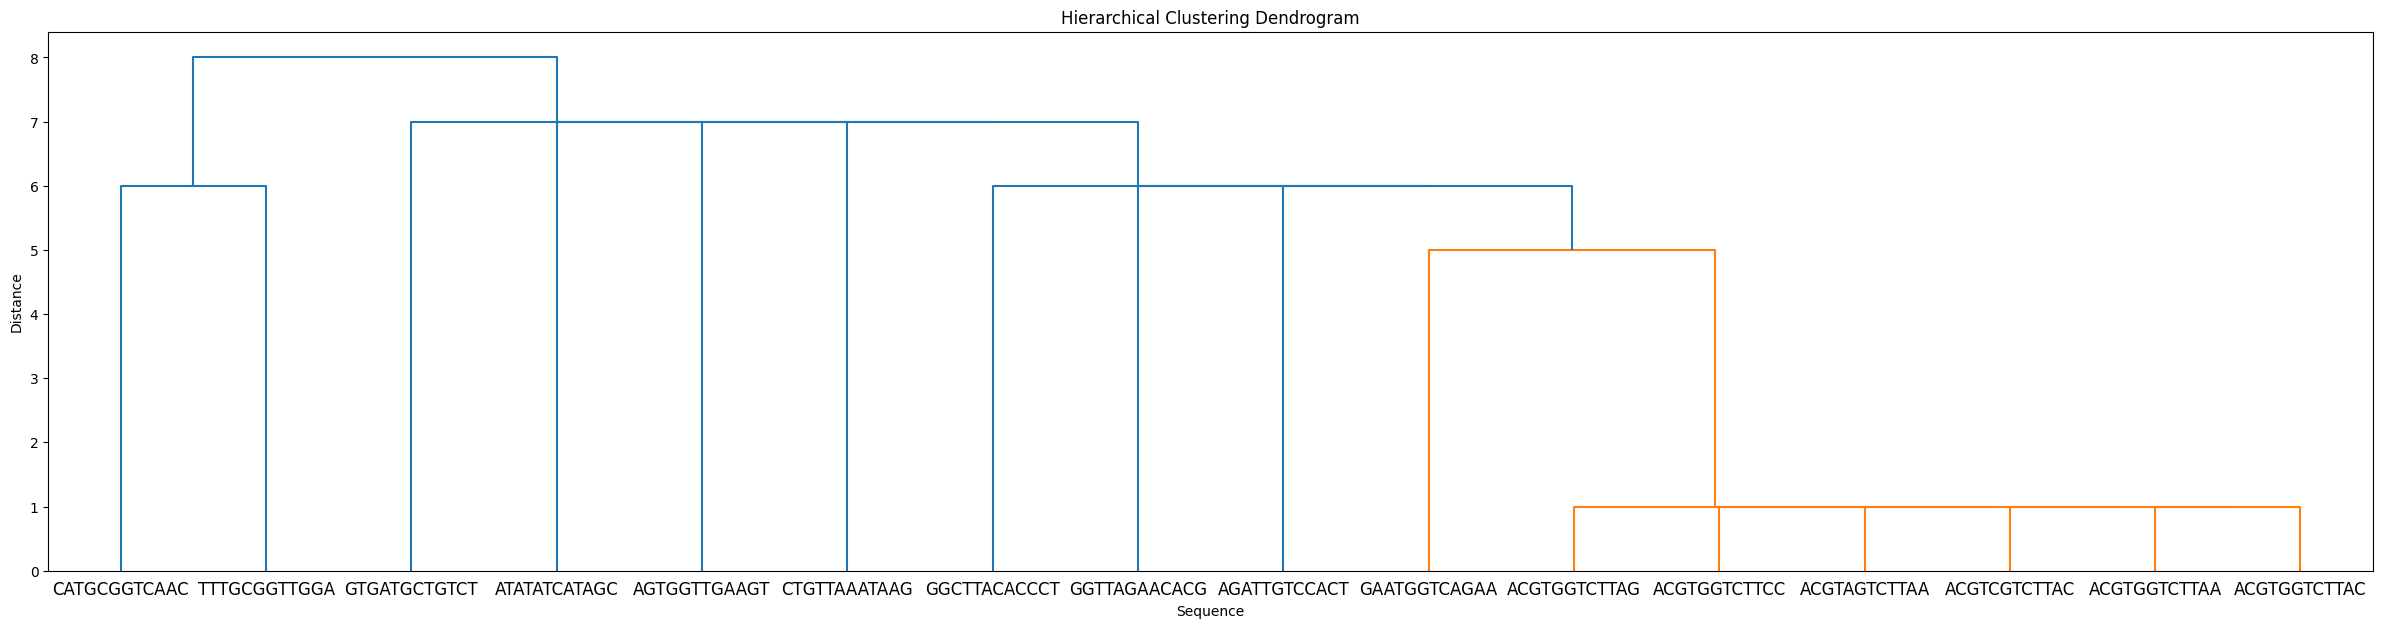

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from scipy.spatial.distance import squareform
import numpy as np

sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

def hamming_distance(s1, s2):
    return sum(el1 != el2 for el1, el2 in zip(s1, s2))

n = len(sequences)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        distance = hamming_distance(sequences[i], sequences[j])
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

Z = linkage(squareform(distance_matrix), 'single')
plt.figure(figsize=(30, 7))
dendrogram(Z, labels=sequences)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sequence')
plt.ylabel('Distance')
plt.show()